# Benchmark Results Analysis

Complete visualization and comparison of PyTorch vs ONNX object detection performance.

## Import Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

## Load Results Data

In [10]:
metrics_df = pd.read_csv('results/metrics.csv')
latency_df = pd.read_csv('results/latency.csv')

print("Metrics Data:")
print(metrics_df)
print("\nLatency Data:")
print(latency_df)

Metrics Data:
   backend  imgsz       mAP    mAP_50    mAP_75  mAP_small  mAP_medium  \
0  pytorch    640  0.329781  0.437829  0.364387   0.130059    0.354983   
1     onnx    640  0.319389  0.425716  0.353462   0.106101    0.344010   
2  pytorch    320  0.240203  0.328069  0.258271   0.025596    0.209949   
3     onnx    320  0.241404  0.331093  0.259081   0.026305    0.207771   

   mAP_large  
0   0.543090  
1   0.524866  
2   0.477443  
3   0.489180  

Latency Data:
   backend  imgsz  mean_latency_ms  std_latency_ms  min_latency_ms  \
0  pytorch    640        89.700699       11.200886       59.040713   
1     onnx    640        45.773547        6.820115       31.187344   
2  pytorch    320        44.187042        3.709912       32.864261   
3     onnx    320        10.815403        3.486293        2.007461   

   max_latency_ms  median_latency_ms  p95_latency_ms  p99_latency_ms  \
0      139.111114          87.175381      112.864273      120.936595   
1       64.734650          43.

## 1. Speed Comparison: Latency

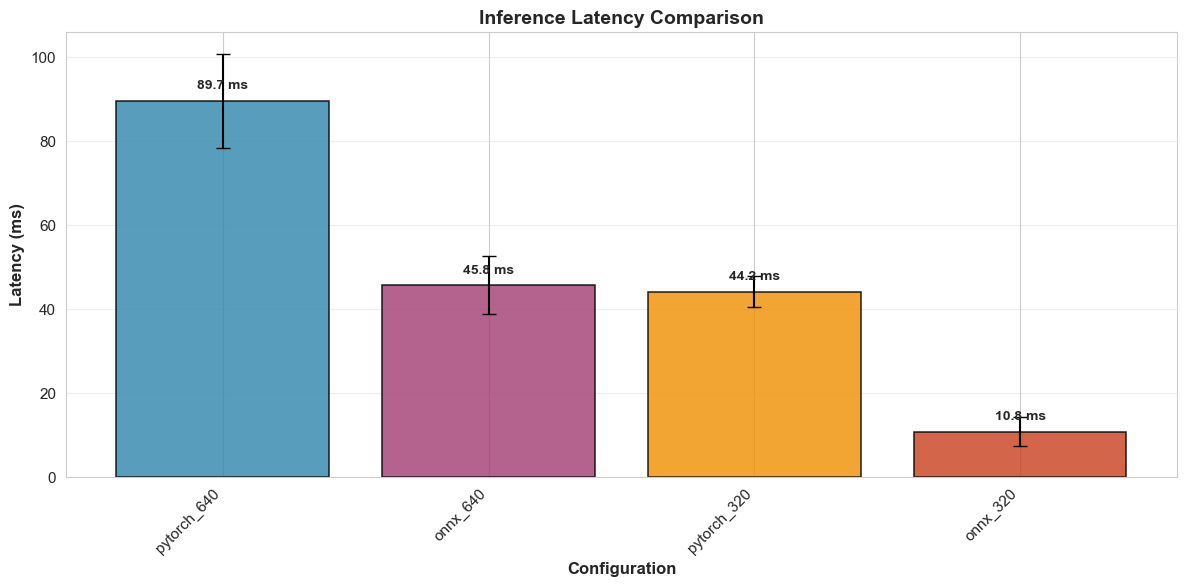

Fastest: onnx_320 (10.82 ms)
Slowest: pytorch_640 (89.70 ms)
Max speedup: 8.29x


In [11]:
latency_df['config'] = latency_df['backend'] + '_' + latency_df['imgsz'].astype(str)

fig, ax = plt.subplots(figsize=(12, 6))

x_pos = np.arange(len(latency_df))
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
bars = ax.bar(
    x_pos, 
    latency_df['mean_latency_ms'], 
    yerr=latency_df['std_latency_ms'],
    capsize=5, 
    alpha=0.8, 
    color=colors[:len(latency_df)],
    edgecolor='black',
    linewidth=1.2
)

ax.set_xlabel('Configuration', fontweight='bold', fontsize=12)
ax.set_ylabel('Latency (ms)', fontweight='bold', fontsize=12)
ax.set_title('Inference Latency Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(latency_df['config'], rotation=45, ha='right', fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{height:.1f} ms', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('results/plots/latency_comparison_final.png', dpi=150, bbox_inches='tight')
plt.show()

fastest_idx = latency_df['mean_latency_ms'].idxmin()
slowest_idx = latency_df['mean_latency_ms'].idxmax()
speedup = latency_df.loc[slowest_idx, 'mean_latency_ms'] / latency_df.loc[fastest_idx, 'mean_latency_ms']
print(f"Fastest: {latency_df.loc[fastest_idx, 'config']} ({latency_df['mean_latency_ms'].min():.2f} ms)")
print(f"Slowest: {latency_df.loc[slowest_idx, 'config']} ({latency_df['mean_latency_ms'].max():.2f} ms)")
print(f"Max speedup: {speedup:.2f}x")

<br>

## 2. Speed Comparison: Throughput (FPS)

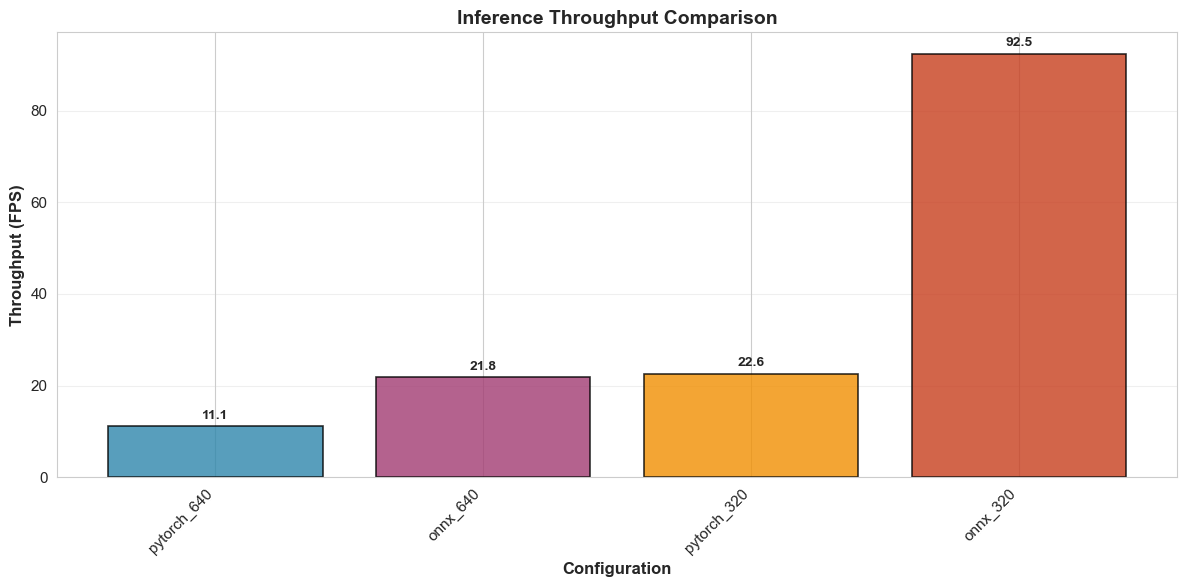

Throughput range: 11.15 - 92.46 FPS


In [12]:
fig, ax = plt.subplots(figsize=(12, 6))

x_pos = np.arange(len(latency_df))
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
bars = ax.bar(
    x_pos, 
    latency_df['throughput_fps'],
    alpha=0.8,
    color=colors[:len(latency_df)],
    edgecolor='black',
    linewidth=1.2
)

ax.set_xlabel('Configuration', fontweight='bold', fontsize=12)
ax.set_ylabel('Throughput (FPS)', fontweight='bold', fontsize=12)
ax.set_title('Inference Throughput Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(latency_df['config'], rotation=45, ha='right', fontsize=11)
ax.grid(True, alpha=0.3, axis='y')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('results/plots/throughput_comparison_final.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Throughput range: {latency_df['throughput_fps'].min():.2f} - {latency_df['throughput_fps'].max():.2f} FPS")

<br>

## 3. Accuracy Comparison: mAP Metrics

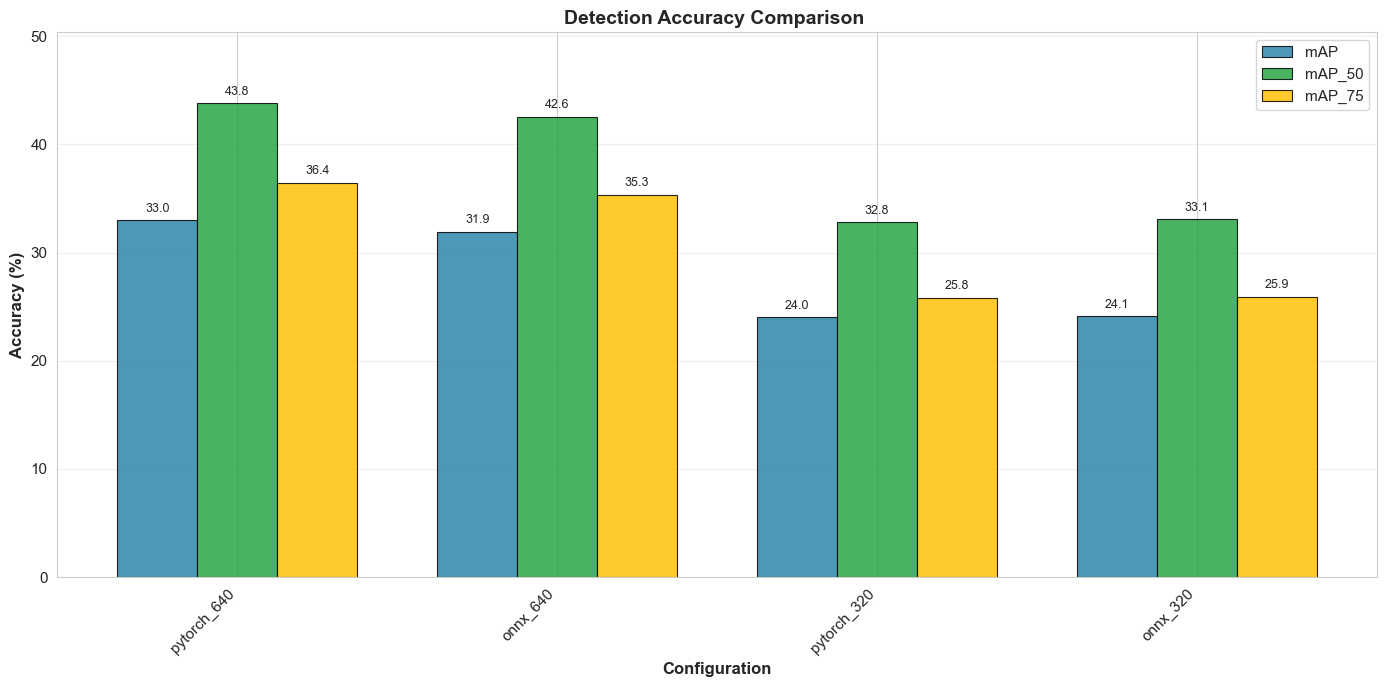

mAP@0.5 range: 32.81% - 43.78%


In [13]:
metrics_df['config'] = metrics_df['backend'] + '_' + metrics_df['imgsz'].astype(str)

metrics_to_plot = ['mAP', 'mAP_50', 'mAP_75']
x = np.arange(len(metrics_df))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 7))
colors_metrics = ['#2E86AB', '#28A745', '#FFC107']

for i, metric in enumerate(metrics_to_plot):
    offset = (i - 1) * width
    bars = ax.bar(x + offset, metrics_df[metric] * 100, width, 
                  label=metric, alpha=0.85, color=colors_metrics[i],
                  edgecolor='black', linewidth=0.8)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{height:.1f}', ha='center', va='bottom', fontsize=9)

ax.set_xlabel('Configuration', fontweight='bold', fontsize=12)
ax.set_ylabel('Accuracy (%)', fontweight='bold', fontsize=12)
ax.set_title('Detection Accuracy Comparison ', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df['config'], rotation=45, ha='right', fontsize=11)
ax.legend(loc='upper right', fontsize=11)
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, metrics_df[metrics_to_plot].max().max() * 100 * 1.15)

plt.tight_layout()
plt.savefig('results/plots/accuracy_comparison_final.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"mAP@0.5 range: {metrics_df['mAP_50'].min()*100:.2f}% - {metrics_df['mAP_50'].max()*100:.2f}%")

## 4. Accuracy vs Speed Tradeoff

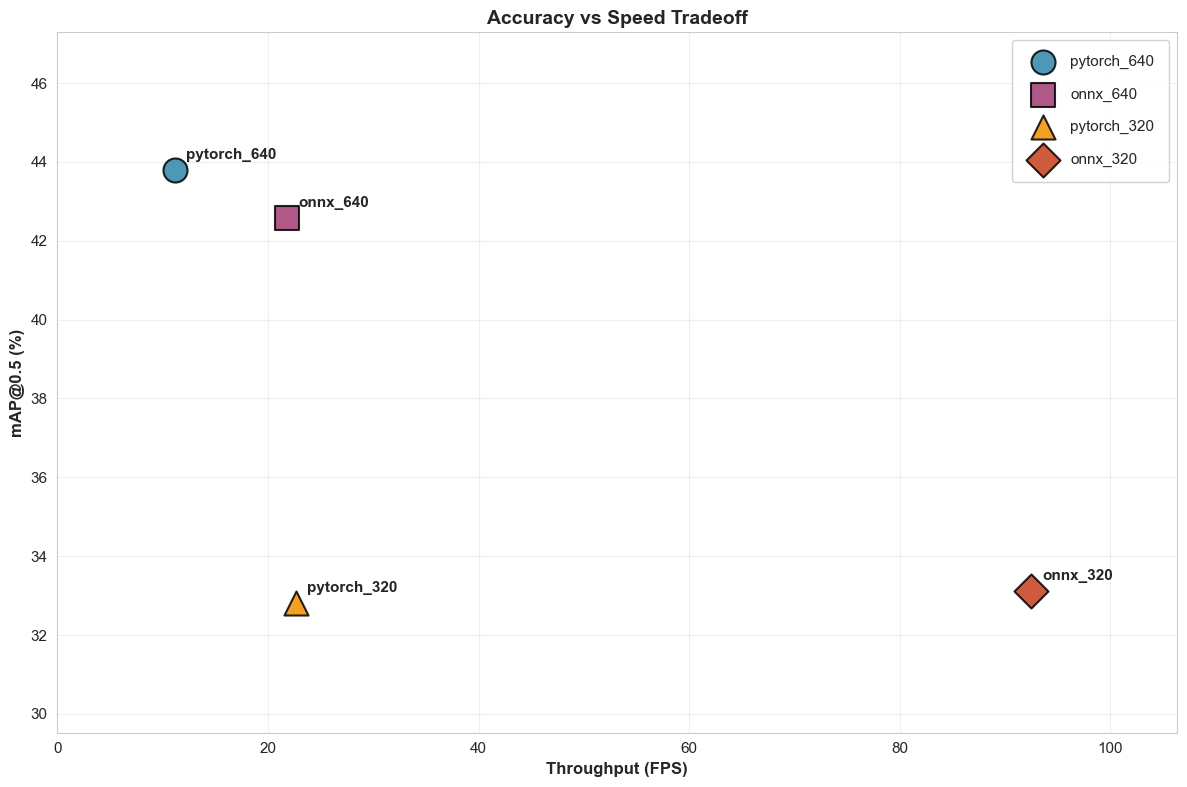

Trade-off Summary:
  pytorch_640: 43.78% @ 11.1 FPS
  onnx_640: 42.57% @ 21.8 FPS
  pytorch_320: 32.81% @ 22.6 FPS
  onnx_320: 33.11% @ 92.5 FPS


In [14]:
combined_df = metrics_df.merge(latency_df, on=['backend', 'imgsz', 'config'])

fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']
markers = ['o', 's', '^', 'D']

for i, (idx, row) in enumerate(combined_df.iterrows()):
    scatter = ax.scatter(
        row['throughput_fps'], 
        row['mAP_50'] * 100,
        s=300,
        c=colors[i % len(colors)],
        marker=markers[i % len(markers)],
        label=row['config'],
        alpha=0.85,
        edgecolors='black',
        linewidths=1.5
    )
    ax.annotate(
        row['config'], 
        (row['throughput_fps'], row['mAP_50'] * 100),
        textcoords="offset points",
        xytext=(8, 8),
        fontsize=11,
        fontweight='bold'
    )

ax.set_xlabel('Throughput (FPS)', fontweight='bold', fontsize=12)
ax.set_ylabel('mAP@0.5 (%)', fontweight='bold', fontsize=12)
ax.set_title('Accuracy vs Speed Tradeoff', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper right', fontsize=11, framealpha=0.9, labelspacing=1.2, borderpad=1.0)
ax.set_xlim(0, combined_df['throughput_fps'].max() * 1.15)
ax.set_ylim(combined_df['mAP_50'].min() * 100 * 0.9, combined_df['mAP_50'].max() * 100 * 1.08)

plt.tight_layout()
plt.savefig('results/plots/tradeoff_analysis_final.png', dpi=150, bbox_inches='tight')
plt.show()

print("Trade-off Summary:")
for idx, row in combined_df.iterrows():
    print(f"  {row['config']}: {row['mAP_50']*100:.2f}% @ {row['throughput_fps']:.1f} FPS")

<br><br>

In [15]:
summary = combined_df[['config', 'mAP_50', 'mean_latency_ms', 'throughput_fps']].copy()
summary['mAP_50'] = summary['mAP_50'].apply(lambda x: f"{x*100:.2f}%")
summary['mean_latency_ms'] = summary['mean_latency_ms'].apply(lambda x: f"{x:.2f} ms")
summary['throughput_fps'] = summary['throughput_fps'].apply(lambda x: f"{x:.2f}")
summary.columns = ['Configuration', 'mAP@0.5', 'Mean Latency', 'Throughput (FPS)']

print(summary.to_string(index=False))

Configuration mAP@0.5 Mean Latency Throughput (FPS)
  pytorch_640  43.78%     89.70 ms            11.15
     onnx_640  42.57%     45.77 ms            21.85
  pytorch_320  32.81%     44.19 ms            22.63
     onnx_320  33.11%     10.82 ms            92.46


<br><br><br>